# Bitcoin Price Forecasting with Machine Learning

This notebook demonstrates the process of forecasting Bitcoin prices using machine learning techniques. We will go through the following steps:
1. Loading and exploring the dataset
2. Normalization
3. Splitting the data into training and testing sets
4. Creation of the LSTM Model
5. Evaluating the model
6. Forecasting future prices

Data source: `https://www.investing.com/crypto/bitcoin/historical-data`

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## Step 1: Load and Explore the Data

First, we'll load the dataset and explore its structure.

In [4]:
# Load the dataset
# data = pd.read_csv('./datasets/coin_Bitcoin.csv', parse_dates=['Date'], index_col='Date')
data = pd.read_csv('./datasets/coin_Bitcoin_full.csv', parse_dates=['Date'], index_col='Date')

# Sort the dataset by date
data = data.sort_index()

# Select the 'Close' price
close_data = data[['Close']]

In [5]:
# Display the first few rows of the dataset
data.head()

,Close,Open,High,Low
Date,,,,
2013-01-01,13.3,13.5,13.6,13.2
2013-01-02,13.3,13.3,13.4,13.2
2013-01-03,13.4,13.3,13.5,13.3
2013-01-04,13.5,13.4,13.5,13.3
2013-01-05,13.4,13.5,13.6,13.3


In [6]:
# Check for missing values
data.isnull().sum()

Close    0
Open     0
High     0
Low      0
dtype: int64

In [7]:
# Basic data information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4177 entries, 2013-01-01 to 2024-06-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4177 non-null   float64
 1   Open    4177 non-null   float64
 2   High    4177 non-null   float64
 3   Low     4177 non-null   float64
dtypes: float64(4)
memory usage: 163.2 KB


In [8]:
# Display summary statistics
data.describe()

,Close,Open,High,Low
count,4177.000000,4177.000000,4177.000000,4177.000000
mean,14146.943261,14130.444434,14474.848815,13762.066411
std,17957.441849,17938.558871,18367.288952,17477.273493
min,13.300000,13.300000,13.400000,13.200000
25%,522.000000,520.500000,542.300000,500.600000
50%,6728.000000,6725.500000,6887.200000,6573.100000
75%,22964.600000,22957.700000,23423.300000,22524.200000
max,73066.300000,73066.700000,73740.900000,71338.400000


In this step, we load the Bitcoin dataset, inspect the first few rows, check for missing values, and convert the 'Date' column to a datetime format while setting it as the index.

## Step 2: Normalization of the data
Next, we'll Normalize the data then split it 80/20 as training and testing sets.

In [9]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

## Step 3: Train-Test Split
We will split the data into training and testing sets. We'll use the last year in the dataset for testing.

In [10]:
# Split the data into training and testing sets (80/20 split)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

## Step 4: Creation of the LSTM Model

In [11]:
# Create datasets for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
3280/3280 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.0018
Epoch 2/10
3280/3280 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 4.9194e-04
Epoch 3/10
3280/3280 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 4.4798e-04
Epoch 4/10
3280/3280 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 3.6061e-04
Epoch 5/10
3280/3280 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 3.4060e-04
Epoch 6/10
3280/3280 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - loss: 2.2045e-04
Epoch 7/10
3280/3280 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - loss: 2.5610e-04
Epoch 8/10
3280/3280 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - loss: 2.9073e-04
Epoch 9/10
3280/3280 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - loss: 2.1523e-04
Epoch 10/10
3280/3280 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - loss: 2.0802e-04


## Step 5: Evaluate the Model
We will evaluate the model by predicting the Bitcoin prices on the test set and calculating the RMSE. We will also visualize the actual vs. predicted prices from both train and test.

In [13]:
# Predicting on test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Reshape y_train and y_test to 2D before inverse_transform
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Transform back to original form
y_train_original = scaler.inverse_transform(y_train_reshaped)
y_test_original = scaler.inverse_transform(y_test_reshaped)

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train_original, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_original, test_predict))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Train RMSE: 746.6296908014839
Test RMSE: 1096.2532326923576


In [14]:
# Plotting the results
train_size = len(X_train)
test_size = len(X_test)

train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:train_size + time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[train_size + (2 * time_step) + 1:len(scaled_data) - 1, :] = test_predict

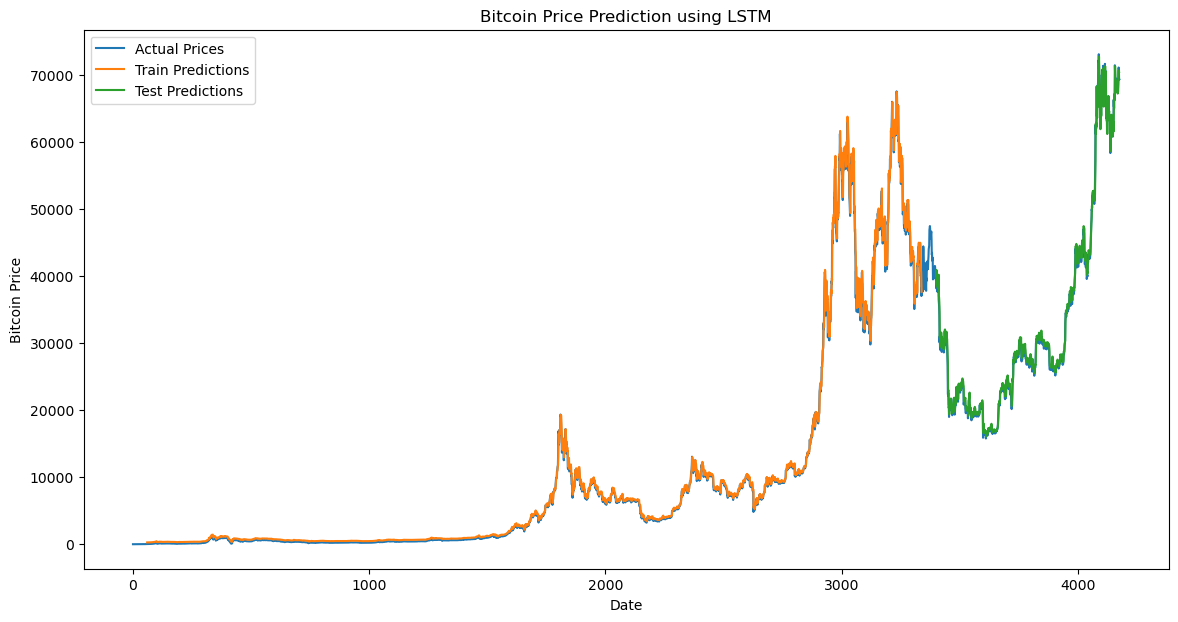

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Prices')
plt.plot(train_plot, label='Train Predictions')
plt.plot(test_plot, label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction using LSTM')
plt.legend()
plt.show()

## Step 6: Forecast Future Prices
Finally, we will forecast the Bitcoin prices for the next year using the trained model.

In [16]:
# Function to predict future values
def predict_future(model, data, time_step, future_steps):
    predictions = []
    
    # Use the last `time_step` data points to start predicting
    last_data_point = data[-time_step:]
    
    for _ in range(future_steps):
        # Reshape data for model prediction
        last_data_point = last_data_point.reshape(1, time_step, 1)
        
        # Make the prediction
        predicted_value = model.predict(last_data_point)
        
        # Append the prediction to the list
        predictions.append(predicted_value[0][0])
        
        # Update last_data_point by removing the first value and appending the predicted value
        last_data_point = np.append(last_data_point[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)
    
    return predictions

In [18]:
# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Set the number of future steps to predict
future_steps = 30  # for 1 month prediction

# Predict future values
future_predictions = predict_future(model, scaled_data, time_step, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates for plotting
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_steps)

# Create a DataFrame for the future predictions
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Close'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━

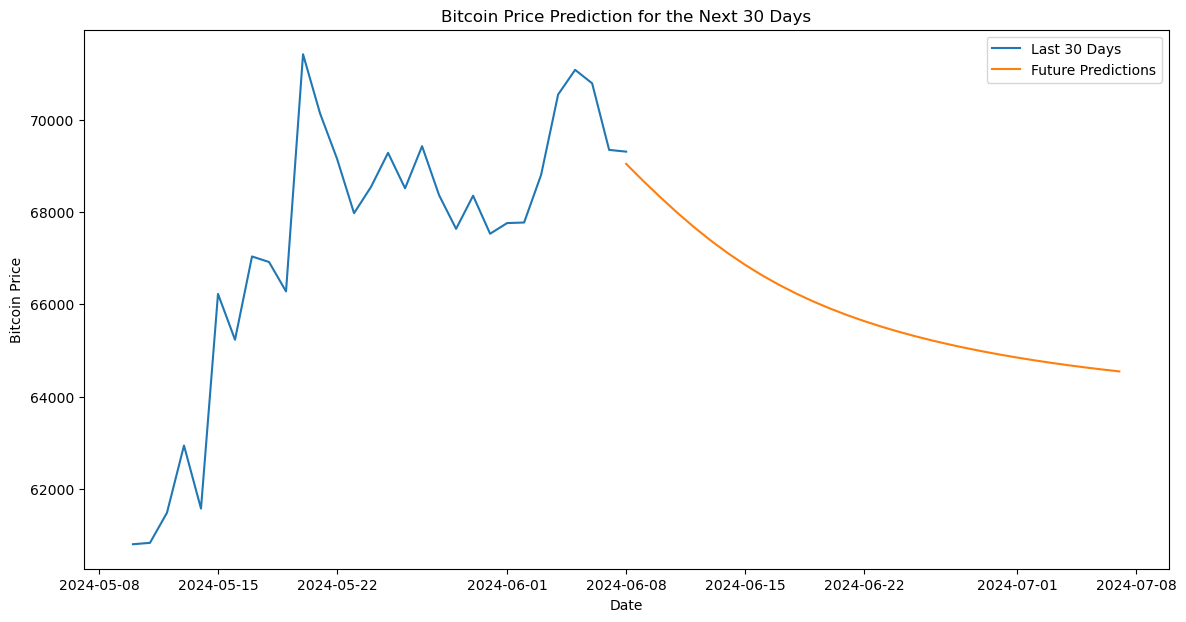

In [19]:
# Plot the results
# Focus the plot on the last 30 days of the original data and the future predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Close'][-30:], label='Last 30 Days')
plt.plot(future_df, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction for the Next 30 Days')
plt.legend()
plt.show()


In [20]:
# Create a DataFrame for the future predictions
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Close'])

# Display the future predictions
future_df

,Predicted Close
2024-06-08,69044.859375
2024-06-09,68676.687500
2024-06-10,68324.828125
2024-06-11,67987.609375
2024-06-12,67670.265625
2024-06-13,67375.132812
2024-06-14,67103.125000
2024-06-15,66854.046875
2024-06-16,66626.906250
2024-06-17,66420.257812


In this final step, we generate future dates and use the trained model to predict Bitcoin prices for the next year. We also plot the predicted future prices to visualize the forecast.

Parameter and Feature adjustment can be further applied to imporve the model's performance.